In [1]:
!pip install imbalanced-learn tensorflow

In [2]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
# 2. Load and preprocess the data
df = pd.read_csv("/content/creditcard.csv")

In [10]:
# Handle missing values in the target variable 'Class'
# Dropping rows where 'Class' is NaN
df.dropna(subset=['Class'], inplace=True)

In [11]:
X = df.drop("Class", axis=1)
y = df["Class"]

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

In [14]:
# 3. Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [16]:
# 4. Train machine learning models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='rbf', C=1.0, gamma='scale'),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

In [17]:
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred

In [18]:
# 5. Neural Network model
nn_model = Sequential()
nn_model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
nn_model.add(Dropout(0.3))
nn_model.add(Dense(16, activation='relu'))
nn_model.add(Dropout(0.3))
nn_model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [21]:
nn_model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=2048, callbacks=[early_stop], verbose=1)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.4610 - loss: 1.0336 - val_accuracy: 0.9043 - val_loss: 0.1960
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7143 - loss: 0.5489 - val_accuracy: 0.8950 - val_loss: 0.1645
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8624 - loss: 0.4184 - val_accuracy: 0.8953 - val_loss: 0.1618
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9174 - loss: 0.3247 - val_accuracy: 0.9104 - val_loss: 0.1516
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9368 - loss: 0.2488 - val_accuracy: 0.9150 - val_loss: 0.1376
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9482 - loss: 0.1925 - val_accuracy: 0.9172 - val_loss: 0.1189
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9556 - loss: 0.1530 - val_accuracy: 0.9427 - val_loss: 0.1001
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9643 - loss: 0.1253 - val_accuracy: 0.9559 - val_loss

In [22]:
y_pred_nn = nn_model.predict(X_test)
y_pred_nn = (y_pred_nn > 0.5).astype("int").flatten()

199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [23]:
predictions["Neural Network"] = y_pred_nn

In [24]:
# 6. Evaluate all models
metrics = {
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": []
}

In [25]:
model_names = list(predictions.keys())

for name in model_names:
    y_pred = predictions[name]
    print(f"\n=== {name} ===")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    metrics["Accuracy"].append(accuracy_score(y_test, y_pred))
    metrics["Precision"].append(precision_score(y_test, y_pred))
    metrics["Recall"].append(recall_score(y_test, y_pred))
    metrics["F1 Score"].append(f1_score(y_test, y_pred))


=== Logistic Regression ===
[[6233  103]
 [   1   19]]
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      6336
         1.0       0.16      0.95      0.27        20

    accuracy                           0.98      6356
   macro avg       0.58      0.97      0.63      6356
weighted avg       1.00      0.98      0.99      6356


=== KNN ===
[[6323   13]
 [   2   18]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6336
         1.0       0.58      0.90      0.71        20

    accuracy                           1.00      6356
   macro avg       0.79      0.95      0.85      6356
weighted avg       1.00      1.00      1.00      6356


=== SVM ===
[[6311   25]
 [   1   19]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6336
         1.0       0.43      0.95      0.59        20

    accuracy                           1.00   

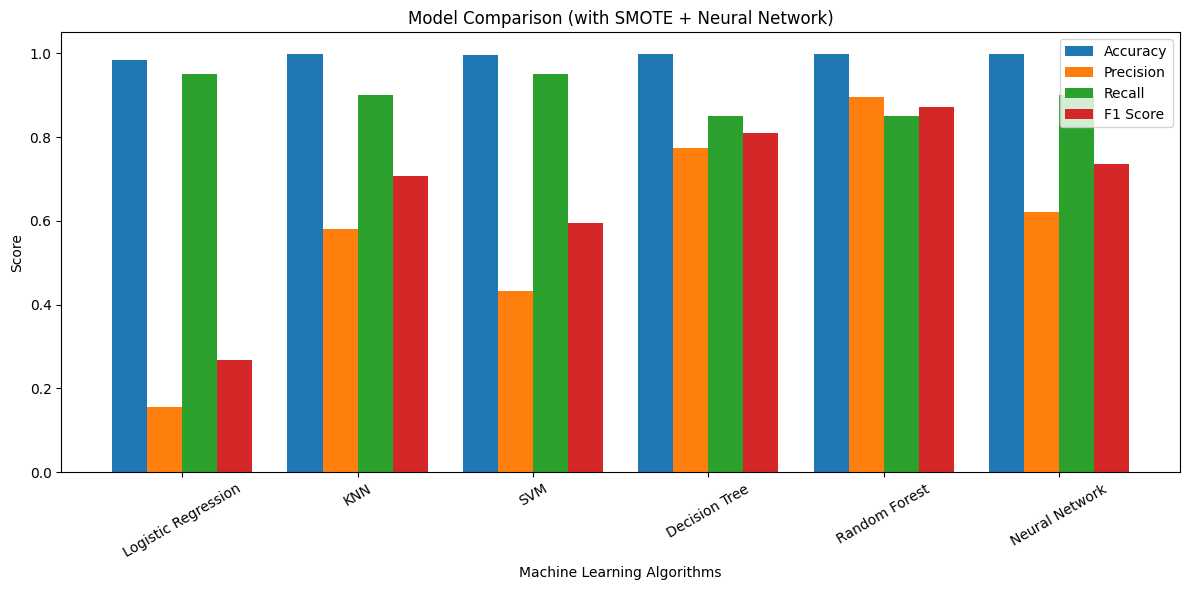

In [27]:
# 7. Plot all performance metrics
x = range(len(model_names))
bar_width = 0.2

plt.figure(figsize=(12, 6))
plt.bar([i - 1.5 * bar_width for i in x], metrics["Accuracy"], width=bar_width, label='Accuracy')
plt.bar([i - 0.5 * bar_width for i in x], metrics["Precision"], width=bar_width, label='Precision')
plt.bar([i + 0.5 * bar_width for i in x], metrics["Recall"], width=bar_width, label='Recall')
plt.bar([i + 1.5 * bar_width for i in x], metrics["F1 Score"], width=bar_width, label='F1 Score')
plt.xlabel("Machine Learning Algorithms")
plt.ylabel("Score")
plt.title("Model Comparison (with SMOTE + Neural Network)")
plt.xticks(x, model_names, rotation=30)
plt.ylim([0.0, 1.05])
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [28]:
# Step 1: Define the feature names (excluding 'Class')
feature_names = list(df.drop("Class", axis=1).columns)

In [51]:
# Step 2: Collect user input
#print("🔍 Enter values for the transaction below:\n")
#user_input = []

#for feature in feature_names:
 #   while True:
  #      try:
   #         val = float(input(f"{feature}: "))
    #        user_input.append(val)
     #       break
      #  except ValueError:
       #     print("Please enter a valid number.")

In [46]:
user_input = [
    406.0,                          # Time
    -2.3122265423263,              # V1
    1.95199201064158,              # V2
    -1.60985073229752,             # V3
    3.9979055875468,               # V4
    -0.522187864667764,            # V5
    -1.42654531920595,             # V6
    -2.53738730624579,             # V7
    1.39165724833352,              # V8
    -2.7700892774234,              # V9
    -2.77227214400346,             # V10
    3.20203320709635,              # V11
    -2.89990738849473,             # V12
    -0.595221881324605,            # V13
    -4.28925378244236,             # V14
    0.389724115920655,             # V15
    -1.14074717980657,             # V16
    -2.83005567450447,             # V17
    -0.018306777944153,            # V18
    -2.93719198930296,             # V19
    -1.71587139363153,             # V20
    -2.62600366640281,             # V21
    1.48864011089835,              # V22
    -2.46301440427903,             # V23
    -0.61198733994012,             # V24
    -3.04154165824943,             # V25
    -0.405202235043638,            # V26
    1.1429305862513,               # V27
    0.422418146001476,             # V28
    0.00                           #amount, dynamically input
]

In [47]:
# Step 3: Convert to DataFrame
user_df = pd.DataFrame([user_input], columns=feature_names)

In [48]:
# Step 4: Scale the input (just like training data)
user_scaled = scaler.transform(user_df)

In [49]:
# Step 5: Predict using the trained model (Random Forest used here)
pred = models["Random Forest"].predict(user_scaled)


In [50]:
# Step 6: Show result
print("\n🎯 Prediction Result:")
if pred[0] == 1:
    print("🚨 FRAUD DETECTED!")
else:
    print("✅ Transaction is Legitimate.")


🎯 Prediction Result:
🚨 FRAUD DETECTED!
